<a href="https://colab.research.google.com/github/iqbalamo93/Autoencoder/blob/master/DietHabbits_UK_DimRecAutoEnco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Given a data set of average eating habits between countries in the United Kingdom, does any particular country stand out  as different **

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [2]:
Url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/UK_foods.csv'

In [3]:
df = pd.read_csv(Url,index_col='Unnamed: 0')

**TASK: Display the DataFrame**

In [4]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [5]:
df=df.transpose()

In [6]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

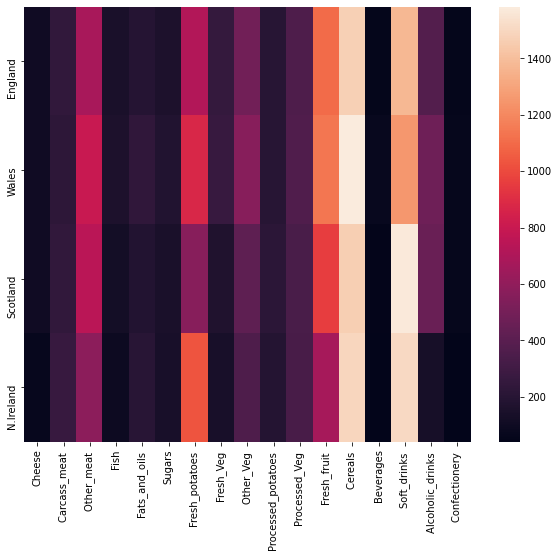

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [22]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu'))
encoder.add(Dense(units=2,activation='relu'))

**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [28]:
decoder = Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [29]:
autoencoder = Sequential([encoder,decoder])

In [30]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [13]:
from sklearn.preprocessing import  MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_df = scaler.fit_transform(df.values)

In [26]:
scaled_df.shape

(4, 17)

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [31]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 2/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 3/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3478
Epoch 4/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3182
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2884
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 8/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2766
Epoch 9/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2721
Epoch 10/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 11/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2560
Epoch 12/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2408
Epoch 13/15
1/1 [==============================] - 0s 1ms/step - loss: 0.

In [32]:
encoded_2d = encoder.predict(scaled_df)

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [33]:
encoded_2d 

array([[1.7989639 , 0.        ],
       [3.346884  , 0.        ],
       [0.92666435, 0.        ],
       [0.13345483, 0.28692955]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [34]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [35]:
results = pd.DataFrame(data=encoded_2d,
                       index=df.index,
                       columns=['C1','C2'])

In [36]:
results

,C1,C2
England,1.798964,0.00000
Wales,3.346884,0.00000
Scotland,0.926664,0.00000
N.Ireland,0.133455,0.28693


In [37]:
results = results.reset_index()

In [38]:
results

,index,C1,C2
0,England,1.798964,0.00000
1,Wales,3.346884,0.00000
2,Scotland,0.926664,0.00000
3,N.Ireland,0.133455,0.28693


**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

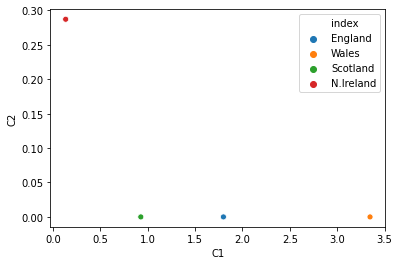

In [39]:
sns.scatterplot(x='C1', y='C2', hue='index',data=results)